# Use google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import library

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import __version__
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

Using TensorFlow backend.


# Parameter

In [0]:
TARGET_SIZE = (299, 299) #fixed size for InceptionV3
BATCH_SIZE = 32
FC_SIZE = 1024
LOWER_LAYERS = 172
n_classes = 196
nb_train_samples = 8144
nb_val_samples = 8041
base_path = '/content/drive/My Drive/computer vision/stanford-car-dataset-by-classes-folder'
#base_path = ''
data_dir = base_path + '/car_data'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'

# Fit into ImageDataGenerator

In [4]:
train_datagen =  ImageDataGenerator(
  preprocessing_function=preprocess_input,
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True)

test_datagen = ImageDataGenerator(
  preprocessing_function=preprocess_input,
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=TARGET_SIZE,
  batch_size=BATCH_SIZE)

validation_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=TARGET_SIZE,
  batch_size=BATCH_SIZE)

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


# Fine-tuning

In [5]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(FC_SIZE, activation='relu')(x) # new FC layer
predictions = Dense(n_classes, activation='softmax')(x) # new softmax layer
model = Model(input=base_model.input, output=predictions)
for layer in model.layers[:LOWER_LAYERS]:
    layer.trainable = False # set the lower layers are not trainable
for layer in model.layers[LOWER_LAYERS:]:
    layer.trainable = True # set the higher layers trainable
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])














87916544/87910968 [==============================] - 4s 0us/step




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


# Train model

## Use checkpoint to save progress

In [0]:
filepath = base_path + "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
# fit the model
history_tl = model.fit_generator(train_generator,
                                nb_epoch=60,
                                samples_per_epoch=nb_train_samples,
                                class_weight='auto',
                                callbacks = callbacks_list, 
                                verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., class_weight="auto", callbacks=[<keras.ca..., verbose=1, steps_per_epoch=254, epochs=60)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/60
254/254 [==============================] - 2455s 10s/step - loss: 5.3511 - acc: 0.0052

Epoch 00001: acc improved from -inf to 0.00518, saving model to /content/drive/My Drive/computer vision/stanford-car-dataset-by-classes-foldermodel.h5
Epoch 2/60
254/254 [==============================] - 288s 1s/step - loss: 5.3074 - acc: 0.0065

Epoch 00002: acc improved from 0.00518 to 0.00653, saving model to /content/drive/My Drive/computer vision/stanford-car-dataset-by-classes-foldermodel.h5
Epoch 3/60
254/254 [==============================] - 287s 1s/step - loss: 5.2735 - acc: 0.0106

Epoch 00003: acc improved from 0.00653 to 0.01036, saving model to /content/drive/My Drive/computer vision/stanford-car-dataset-by-classes-foldermodel.h5
Epoch 4/60
254/254 [==============================] - 289s 1s/step - loss: 5.2445 - acc: 0.0141

Epoch 00004: acc improved from 0.01036 to 0.01418, savi

# Evaluate model

In [0]:
evalute = model.evaluate_generator(validation_generator,
                                   verbose=1)
print(evalute[1])

 60/252 [======>.......................] - ETA: 33:51

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 60 could not be retrieved. It could be because a worker has died.
  UserWarning)


252/252 [==============================] - 2584s 10s/step
0.5124984454781006


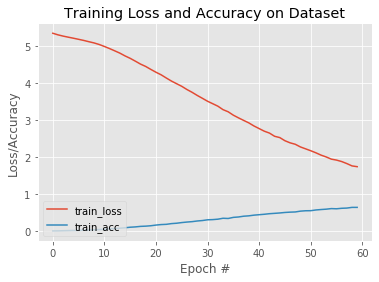

In [0]:
# plot the training loss and accuracy
N = 60
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history_tl.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_tl.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# Resume training

In [8]:
# load the model
try:
    model.load_weights(base_path+"/model.h5")
    print("Model is loaded.")
except:
    print("No model is loaded.")

Model is loaded.


In [12]:
# fit the model
history_tl = model.fit_generator(train_generator,
                                nb_epoch=10,
                                samples_per_epoch=nb_train_samples,
                                class_weight='auto',
                                callbacks = callbacks_list, 
                                verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., class_weight="auto", callbacks=[<keras.ca..., verbose=1, steps_per_epoch=254, epochs=10)`
  


Epoch 1/10
254/254 [==============================] - 3393s 13s/step - loss: 0.3056 - acc: 0.9467

Epoch 00001: acc improved from -inf to 0.94699, saving model to /content/drive/My Drive/computer vision/stanford-car-dataset-by-classes-foldermodel.h5
Epoch 2/10
254/254 [==============================] - 241s 950ms/step - loss: 0.3010 - acc: 0.9470

Epoch 00002: acc improved from 0.94699 to 0.94712, saving model to /content/drive/My Drive/computer vision/stanford-car-dataset-by-classes-foldermodel.h5
Epoch 3/10
254/254 [==============================] - 242s 953ms/step - loss: 0.2931 - acc: 0.9509

Epoch 00003: acc improved from 0.94712 to 0.95106, saving model to /content/drive/My Drive/computer vision/stanford-car-dataset-by-classes-foldermodel.h5
Epoch 4/10
254/254 [==============================] - 242s 952ms/step - loss: 0.2870 - acc: 0.9500

Epoch 00004: acc did not improve from 0.95106
Epoch 5/10
254/254 [==============================] - 242s 952ms/step - loss: 0.2905 - acc: 0.94

In [0]:
evalute = model.evaluate_generator(validation_generator,
                                   verbose=1)
print(evalute[1])

111/252 [============>.................] - ETA: 30:54